In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [2]:
probs_cols = [
    "censys",
    "driftnet",
    "internetcensus",
    "intrinsec",
    "ipip",
    "onyphe",
    "rapid7",
    "securitytrails",
    "shadowserver",
    "shodan",
    "u_mich",
    "unk_bruteforcer",
    "unk_exploiter",
    "unk_spammer",
    "unknown"
]
probs_cols.sort()

In [3]:
df = pd.read_csv("../data/2022/input/skf/predictions_stratified/darknet_features_20221021_fold0.csv")

unk_spammer 492
shadowserver 289
unk_bruteforcer 278
driftnet 252
internetcensus 226
censys 110
onyphe 97
shodan 26
securitytrails 18
intrinsec 12
ipip 12
u_mich 10
unk_exploiter 10
rapid7 0
unknown 0


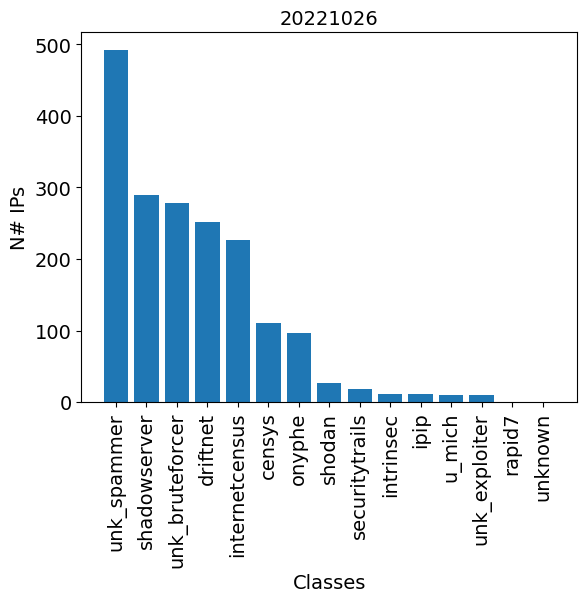

In [6]:
def plot_dist(df, day, probs_cols):
    
    counts = df[df.y_true != 'unknown'].y_true.value_counts()
    
    l = [ [col, counts[col]] if col in counts else [col, 0] for col in probs_cols ]
    l.sort(key=lambda x: x[1], reverse=True)
    
    x = [ t[0] for t in l ]
    y = [ t[1] for t in l ]
    
    plt.bar(x, y)
    
    plt.xlabel("Classes", fontsize=14)
    plt.ylabel("N# IPs", fontsize=14)
    plt.xticks(fontsize=14, rotation=90)
    plt.yticks(fontsize=14)
    plt.title(day, fontsize=14)
    for l, v in zip(x, y):
        print(l, v)
    
plot_dist(df, "20221026", probs_cols)

In [16]:
days = sorted(
    [
        f.split("/")[-1].split("_")[2]
        for f in glob(
            f"../data/2022/input/skf/predictions_stratified/darknet_features_*_fold0.csv"
        )
    ]
)
days, len(days)

(['20221021',
  '20221022',
  '20221023',
  '20221024',
  '20221025',
  '20221026',
  '20221027',
  '20221028',
  '20221029',
  '20221030',
  '20221031'],
 11)

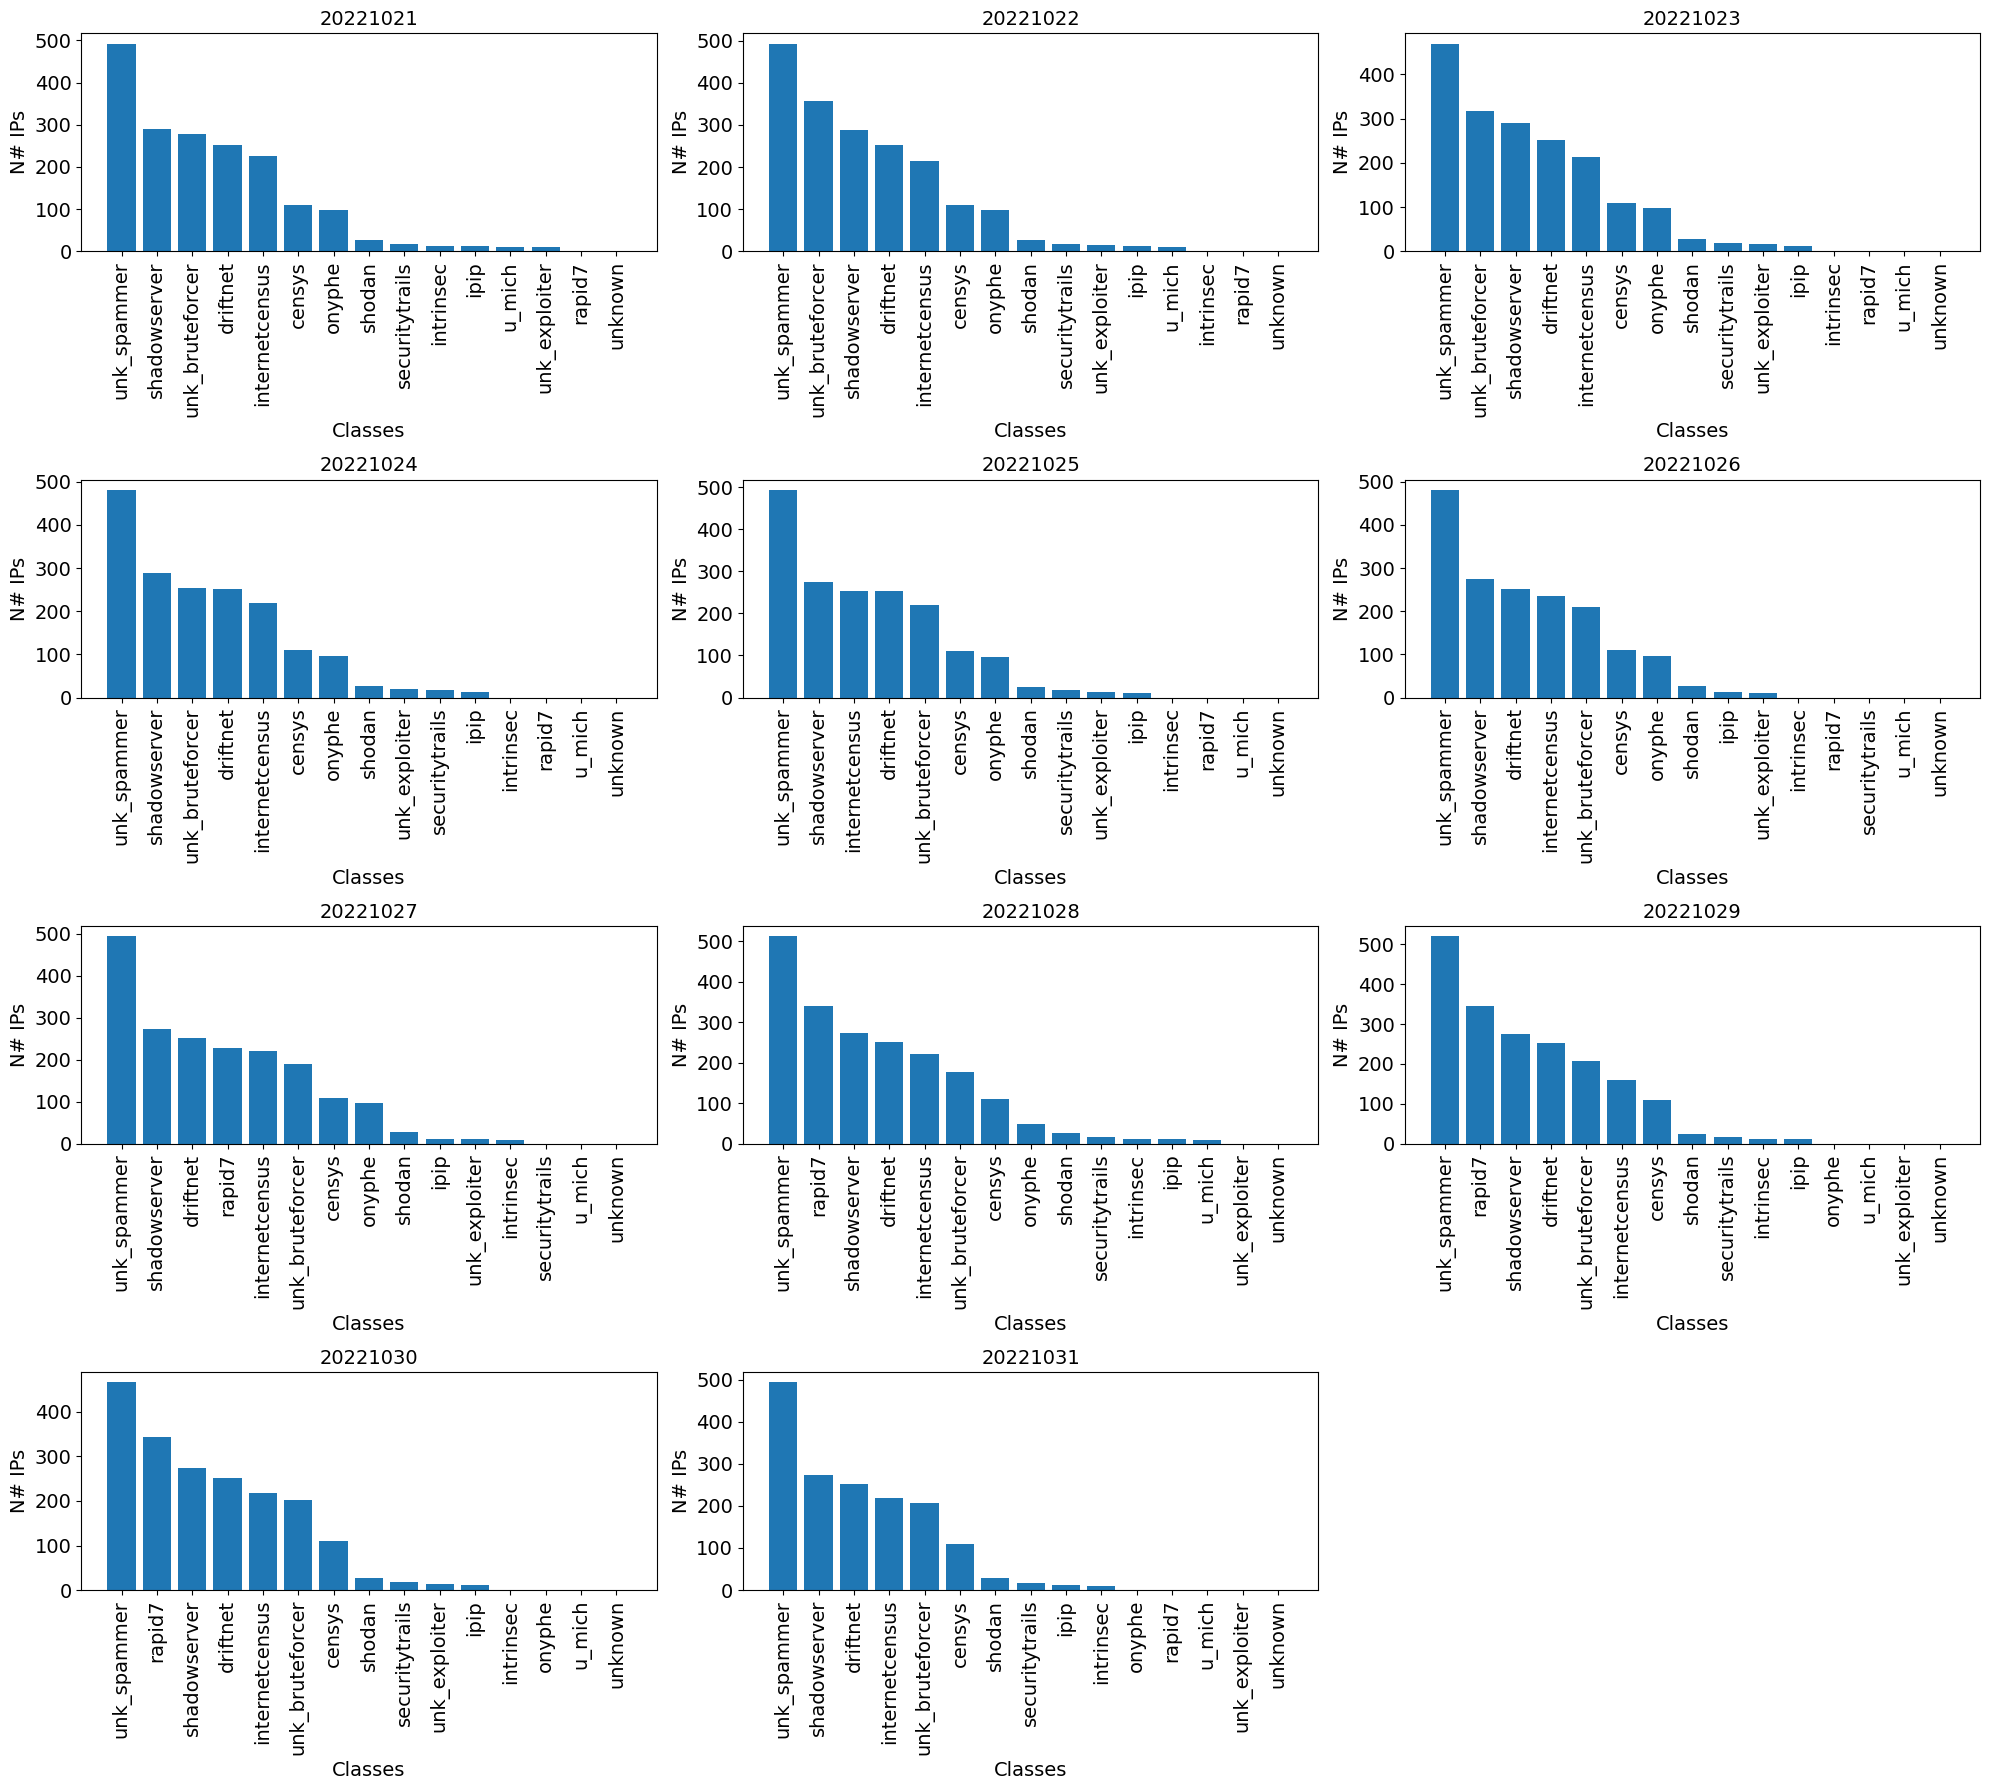

In [26]:
plt.figure(figsize=(20, 18))
for pidx, day in enumerate(days):
    plt.subplot(4, 3, pidx + 1)
    df = pd.read_csv(
        f"../data/2022/input/skf/predictions_stratified/darknet_features_{day}_fold0.csv"
    )
    plot_dist(df, day, probs_cols)

plt.tight_layout()

In [19]:
loader = np.load("/home/welton/DarkNet/stacking_data/vanilla/20211221/idarkvec-igcngru_features/0/data.npz")

In [21]:
loader["X_train"].shape

(3645, 30)

In [21]:
pd.read_csv("../data/2022/input/skf/predictions_stratified/darknet_nlp_20221023_fold2.csv").shape

(13577, 18)